In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import hashlib
import keras

Using TensorFlow backend.


In [2]:
(data, _), (_, _) = keras.datasets.cifar10.load_data()
np.random.shuffle(data)
data = data[:20]
data = data/255
data = np.clip(np.array([cv2.resize(
    data_,
    dsize=(data.shape[1]*4,data.shape[2]*4),
    interpolation=cv2.INTER_LANCZOS4) for data_ in data]), 0, 1) - 0.5

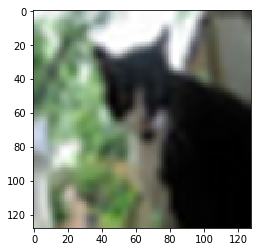

In [3]:
plt.imshow(data[np.random.randint(0,len(data))] + 0.5, cmap='gray')
plt.show()

In [4]:
keys = np.exp(np.random.rand(*data.shape) *2*np.pi*1j)
keys = np.reshape(keys, (data.shape[0],-1))

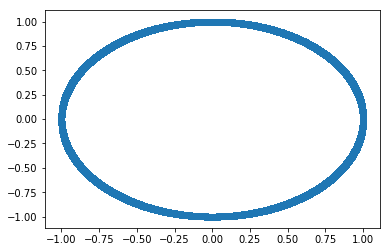

In [5]:
plt.scatter(np.real(keys), np.imag(keys))
plt.show()

In [6]:
ps = []
for i in range(4):
    p = np.arange(data.shape[1]*data.shape[2]*data.shape[3])
    np.random.shuffle(p)
    ps.append(p)
ps = np.array(ps)

In [7]:
cs = np.array([np.sum(np.reshape(keys[:,p],data.shape) * data, axis=0) for p in ps])

15


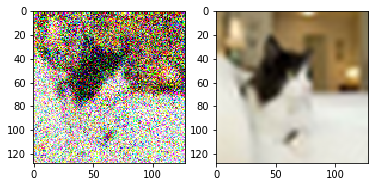

In [8]:
i = np.random.randint(0,len(data))
print(i)
y = np.array([
    np.conj(np.reshape(keys[i,p],data.shape[1:]))*c
    for p,c in zip(ps,cs)])
y = np.real(y)
y = np.mean(y + 0.5, axis=0)
y = np.clip(y , 0, 1)
plt.subplot(1,2,1)
plt.imshow(y, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(data[i] + 0.5, cmap='gray')
plt.show()